In [49]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "./data/mouse_drug_data.csv"
clinical_trial_data_to_load = "./data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_reader = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_reader = pd.read_csv(clinical_trial_data_to_load)

In [50]:
#revewing Mouse csv data
mouse_data_reader.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [51]:
#revewing clinical trial csv data
clinical_trial_reader.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [52]:
df = pd.merge(mouse_data_reader,clinical_trial_reader, how= 'outer', on= 'Mouse ID')
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [53]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_data = df.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)': 'mean'}).reset_index()
# Convert to DataFrame
mean_tumor_volume_data_df = pd.DataFrame(mean_tumor_volume_data)
# Preview DataFrame
mean_tumor_volume_data_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [54]:
#source[groupbymltcolumns]:https://stackoverflow.com/questions/40553002/pandas-group-by-two-columns-to-get-sum-of-another-column

In [55]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_tumor_volume_data = df.groupby(['Drug','Timepoint']).agg({'Tumor Volume (mm3)': 'sem'}).reset_index()
# Convert to DataFrame
SE_tumor_volume_data_df = pd.DataFrame(SE_tumor_volume_data)
# Preview DataFrame
SE_tumor_volume_data_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [56]:
#Make pivot of SE values to create error bars
SE_tumor_volume_data_pivot = pd.pivot_table(SE_tumor_volume_data_df, values="Tumor Volume (mm3)",index=['Timepoint'], columns=['Drug'])
SE_tumor_volume_data_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [57]:
# Minor Data Munging to Re-Format the Data Frames
#Drug becomes the column, set Timepoint as index , values are Tumor Volume (mm3)
#As per the table provided, I will be using the Mean value table

mean_tumor_volume_pivot_df = pd.pivot_table(mean_tumor_volume_data_df, values="Tumor Volume (mm3)",index=['Timepoint'], columns=['Drug'])
# Preview that Reformatting worked
mean_tumor_volume_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


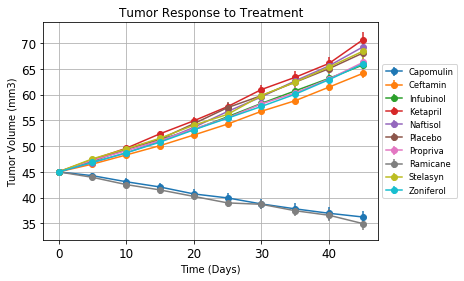

In [115]:
# Generate a line graph plot (with Error Bars) 
 #Using the pivot table created above
    
ax = mean_tumor_volume_pivot_df.plot.line(yerr=SE_tumor_volume_data_pivot, marker ="o",grid= True, figsize=(6,4), fontsize = 12)
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Time (Days)")
ax.set_title('Tumor Response to Treatment')
ax.autoscale()
ax.use_sticky_edges = False


#assign font to legend
plt.legend(fontsize = 'small',loc='center left', bbox_to_anchor=(1, 0.5))

#format xticks
plt.xticks(range(0,df['Timepoint'].max(),10))

# Save the Figure
plt.savefig('Tumor_Response_to_Treatment.png',dpi=150)
plt.show()


In [59]:
#source[pivottable]:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
#source[errorbars]: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
#source[legendformats]: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

## Metastatic Response to Treatment

In [60]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site_data = df.groupby(['Drug','Timepoint']).agg({'Metastatic Sites': 'mean'}).reset_index()
# Convert to DataFrame
mean_met_site_data_df = pd.DataFrame(mean_met_site_data)
# Preview DataFrame
mean_met_site_data_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [61]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_met_site_data = df.groupby(['Drug','Timepoint']).agg({'Metastatic Sites': 'sem'}).reset_index()
# Convert to DataFrame
SE_met_site_data_df = pd.DataFrame(SE_met_site_data )
# Preview DataFrame
SE_met_site_data_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [62]:
#Make pivot of SE values to create error bars
SE_met_site_data_pivot = pd.pivot_table(SE_met_site_data_df, values="Metastatic Sites",index=['Timepoint'], columns=['Drug'])
SE_met_site_data_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [63]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site_data_pivot_df = pd.pivot_table(mean_met_site_data_df, values="Metastatic Sites",index=['Timepoint'], columns=['Drug'])
# Preview that Reformatting worked
mean_met_site_data_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


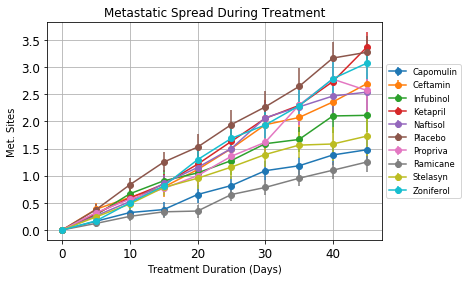

In [114]:
# Generate the Plot (with Error Bars)
    
ax = mean_met_site_data_pivot_df.plot.line(yerr=SE_met_site_data_pivot, marker ="o",grid= True, figsize=(6,4), fontsize = 12)
ax.set_ylabel("Met. Sites")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_title('Metastatic Spread During Treatment')
ax.autoscale()
ax.use_sticky_edges = False

#assign font to legend
plt.legend(fontsize = 'small',loc='center left', bbox_to_anchor=(1, 0.5))

#format xticks
plt.xticks(range(0,df['Timepoint'].max(),10))


# Save the Figure
plt.savefig('Metastatic_Spread_During_Treatment.png',dpi=150)
plt.show()


## Survival Rates

In [65]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_survival_data = df.groupby(['Drug','Timepoint']).agg({'Mouse ID': 'count'}).reset_index()
# Convert to DataFrame
count_mice_survival_data_df = pd.DataFrame(count_mice_survival_data)
# Preview DataFrame
count_mice_survival_data_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [66]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_survival_data_pivot_df = pd.pivot_table(count_mice_survival_data_df, values="Mouse ID",index=['Timepoint'], columns=['Drug'])
# Preview that Reformatting worked
count_mice_survival_data_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [73]:
survival_rates = (count_mice_survival_data_pivot_df / count_mice_survival_data_pivot_df.loc[0]) * 100
survival_rates

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


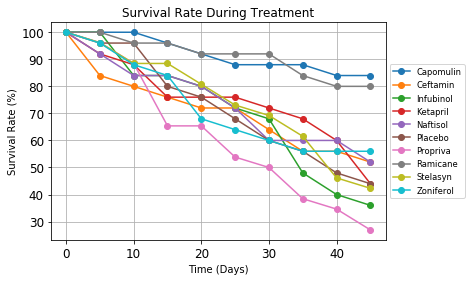

In [113]:
# Generate the Plot (Accounting for percentages)
ax = survival_rates.plot.line(marker ="o",grid= True, figsize=(6,4), fontsize = 12)
ax.set_ylabel("Survival Rate (%)")
ax.set_xlabel("Time (Days)")
ax.set_title('Survival Rate During Treatment')
ax.autoscale()
ax.use_sticky_edges = False


#assign font to legend
plt.legend(fontsize = 'small',loc='center left', bbox_to_anchor=(1, 0.5))

#format xticks
plt.xticks(range(0,df['Timepoint'].max(),10))

#format margins


# Save the Figure
plt.savefig('Survival_Rate_During_Treatment.png',dpi=100)

## Summary Bar Graph

In [308]:
# Calculate the tumor volume percent changes for each drug
summary = ((mean_tumor_volume_pivot_df.loc[45]-mean_tumor_volume_pivot_df.loc[0])/mean_tumor_volume_pivot_df.loc[0])* 100
# Display the data to confirm
summary_s = summary.reset_index(name = "Tumor Volume (mm3)")
summary_df = pd.DataFrame(summary_s).sort_values(by='Tumor Volume (mm3)')
summary_df


,Drug,Tumor Volume (mm3)
7,Ramicane,-22.320900
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
9,Zoniferol,46.579751
6,Propriva,47.241175
5,Placebo,51.297960
8,Stelasyn,52.085134
4,Naftisol,53.923347
3,Ketapril,57.028795


In [314]:
summary_df_pivot = pd.pivot_table(summary_df,values="Tumor Volume (mm3)",index=['Drug'])
summary_df_pivot_sorted = summary_df_pivot.sort_values(by = "Tumor Volume (mm3)")
summary_df_pivot_sorted

,Tumor Volume (mm3)
Drug,
Ramicane,-22.320900
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Zoniferol,46.579751
Propriva,47.241175
Placebo,51.297960
Stelasyn,52.085134
Naftisol,53.923347


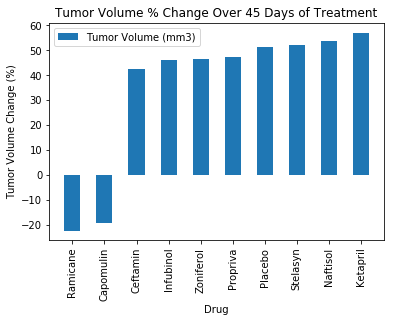

In [320]:
ax = summary_df_pivot_sorted.plot(kind = 'bar')
ax.set_ylabel("Tumor Volume Change (%)")
ax.set_xlabel("Drug")
ax.set_title('Tumor Volume % Change Over 45 Days of Treatment')
ax.autoscale()
ax.use_sticky_edges = False

plt.show()

In [172]:
# Splice the data between passing and failing drugs
sorted_summary.plot.bar
plt.show()
# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure

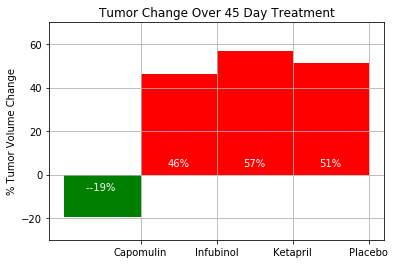